**This is a Jupyter Notebook!**

In this notebook you can document data cleaning and analyses with narrative and render output, creating "literate" code. 



Let's first load some R packages

In [68]:
library(ggplot2)
library(psych)

We'll use some existing data from the R Psych package.

In [69]:
bfi_data<-bfi
head(bfi_data)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
61617,2,4,3,4,4,2,3,3,4,4,...,2,3,3,6,3,4,3,1,NA,16
61618,2,4,5,2,5,5,4,4,3,4,...,5,5,4,2,4,3,3,2,NA,18
61620,5,4,5,4,4,4,5,4,2,5,...,2,3,4,2,5,5,2,2,NA,17
61621,4,4,6,5,5,4,4,3,5,5,...,4,1,3,3,4,3,5,2,NA,17
61622,2,3,3,4,5,4,4,5,3,2,...,4,3,3,3,4,3,3,1,NA,17
61623,6,6,5,6,5,6,6,6,1,3,...,2,3,4,3,5,6,1,2,3,21


Next, we'll need to create composite scores, again using the psych package

In [70]:
keys.list <-
  list(agree=c("-A1","A2","A3","A4","A5"),conscientious=c("C1","C2","C3","-C4","-C5"),
extraversion=c("-E1","-E2","E3","E4","E5"),neuroticism=c("N1","N2","N3","N4","N5"),
openness = c("O1","-O2","O3","O4","-O5")) 

scores <- scoreItems(keys.list,bfi_data,min=1,max=6) #specify the minimum and maximum values

head(scores$scores)


,agree,conscientious,extraversion,neuroticism,openness
61617,4.0,2.8,3.8,2.8,3.0
61618,4.2,4.0,5.0,3.8,4.0
61620,3.8,4.0,4.2,3.6,4.8
61621,4.6,3.0,3.6,2.8,3.2
61622,4.0,4.4,4.8,3.2,3.6
61623,4.6,5.6,5.6,3.0,5.0


We can also calculate alpha for each scale

In [71]:
scores$alpha

,agree,conscientious,extraversion,neuroticism,openness
alpha,0.7012375,0.7246871,0.7596948,0.8117752,0.5967716


Now let's add these scores to our original dataset

In [72]:
bfi_data <- cbind(bfi_data,as.data.frame(scores$scores))
head(bfi_data)


,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,O4,O5,gender,education,age,agree,conscientious,extraversion,neuroticism,openness
61617,2,4,3,4,4,2,3,3,4,4,...,4,3,1,NA,16,4.0,2.8,3.8,2.8,3.0
61618,2,4,5,2,5,5,4,4,3,4,...,3,3,2,NA,18,4.2,4.0,5.0,3.8,4.0
61620,5,4,5,4,4,4,5,4,2,5,...,5,2,2,NA,17,3.8,4.0,4.2,3.6,4.8
61621,4,4,6,5,5,4,4,3,5,5,...,3,5,2,NA,17,4.6,3.0,3.6,2.8,3.2
61622,2,3,3,4,5,4,4,5,3,2,...,3,3,1,NA,17,4.0,4.4,4.8,3.2,3.6
61623,6,6,5,6,5,6,6,6,1,3,...,6,1,2,3,21,4.6,5.6,5.6,3.0,5.0


We can start to visualize some relationships amongst the variables

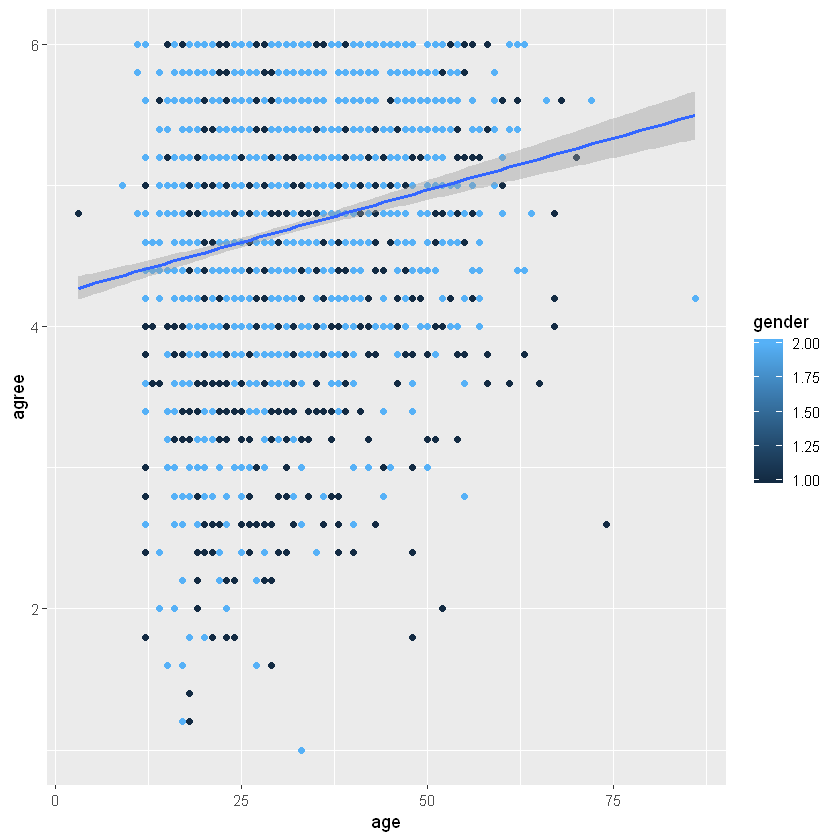

In [74]:
ggplot(aes(x=age, y=agree),data=bfi_data) +
geom_point(aes(color=gender))+  # scatter plot
  geom_smooth(method="lm")